In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATASET_LOCATION = R"C:\Users\William\Desktop\formação\mit\code\week1\case_study_suicide_rate\master.csv"

In [2]:
suicide = pd.read_csv(DATASET_LOCATION)
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
suicide.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

In [6]:
suicide.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


## univariate analysis

Text(0.5, 1.0, 'Countries with least amount of suicides')

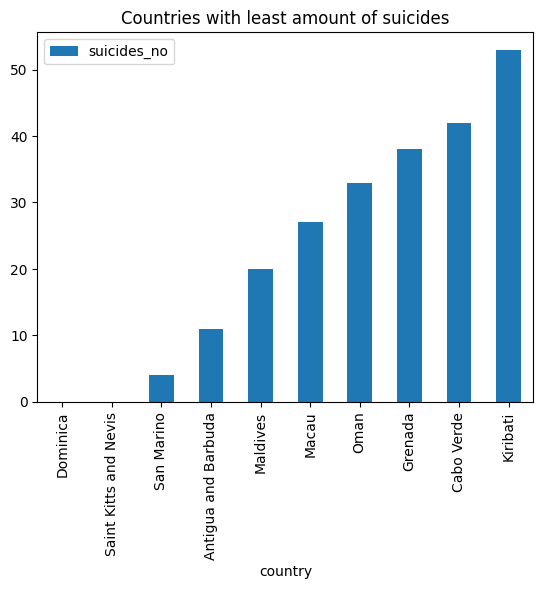

In [13]:
suicide.groupby(["country"])["suicides_no"].sum().to_frame().sort_values("suicides_no").head(10).plot(kind="bar")
plt.title("Countries with least amount of suicides")

Text(0.5, 1.0, 'Countries with the most amount of suicides')

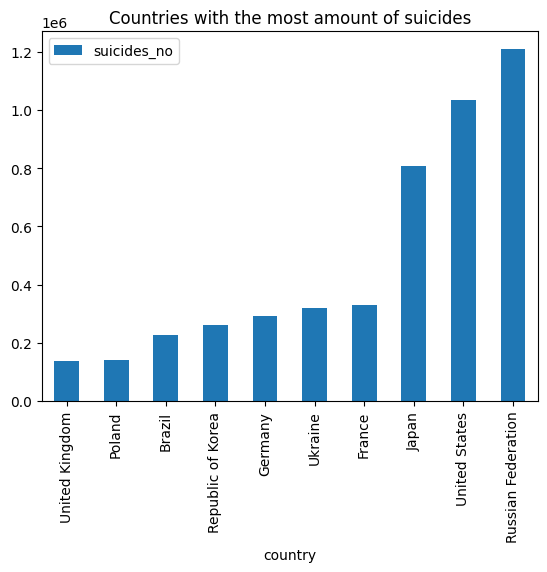

In [14]:
suicide.groupby(["country"])["suicides_no"].sum().to_frame().sort_values("suicides_no").tail(10).plot(kind="bar")
plt.title("Countries with the most amount of suicides")

<Axes: xlabel='year'>

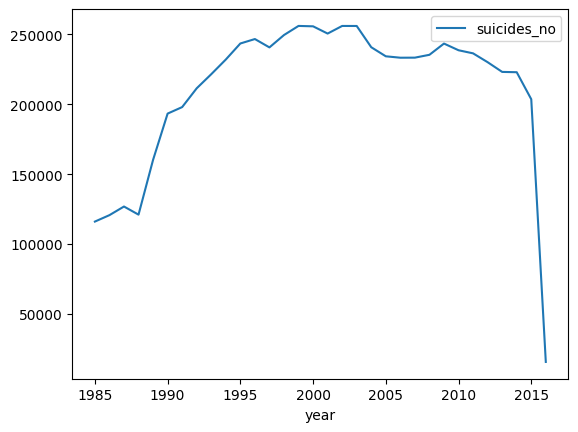

In [18]:
suicide.groupby("year")["suicides_no"].sum().to_frame().plot()

<Axes: xlabel='age', ylabel='suicides_no'>

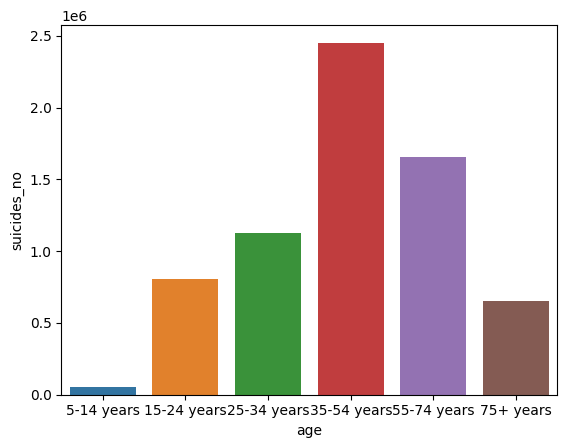

In [41]:
ages = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']

suicide_by_year = suicide.groupby(["age"])["suicides_no"].sum().reindex(ages).reset_index()

sns.barplot(data=suicide_by_year, x="age", y="suicides_no")

<Axes: xlabel='generation', ylabel='suicides_no'>

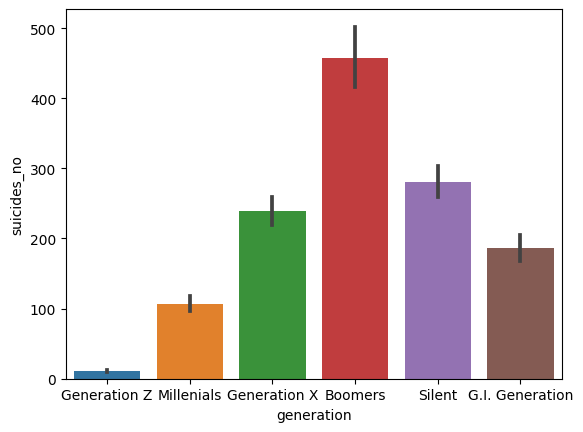

In [54]:
generations = reversed(['G.I. Generation', 'Silent', 'Boomers', 'Generation X','Millenials', 'Generation Z'])
sns.barplot(data=suicide, x="generation", y="suicides_no", order=generations)

<Axes: xlabel='sex'>

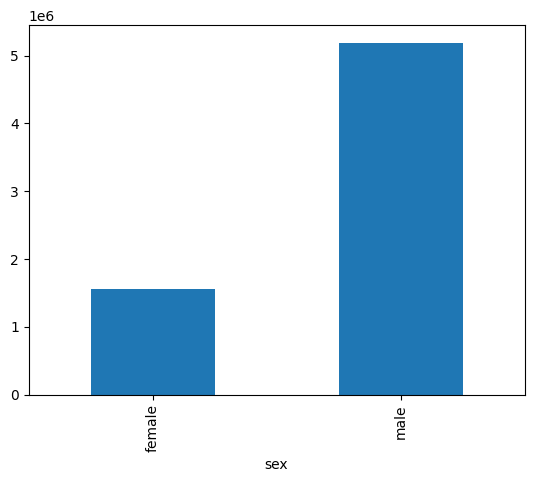

In [59]:
suicide.groupby(by=["sex"])['suicides_no'].sum().plot(kind="bar")

## Bivariate Analysis

<Axes: xlabel='population', ylabel='suicides_no'>

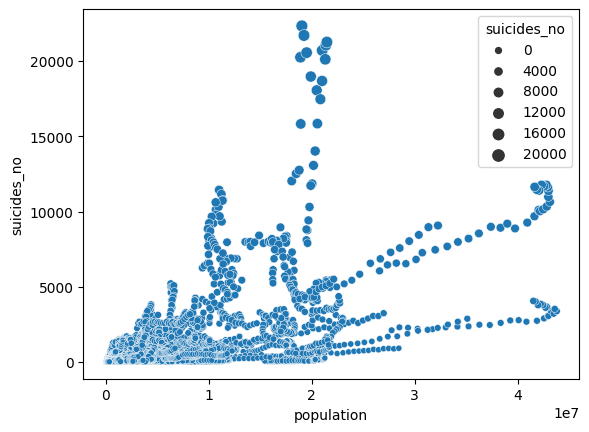

In [61]:
sns.scatterplot(data=suicide, x="population", y="suicides_no", size="suicides_no")

<Axes: xlabel='population', ylabel='suicides_no'>

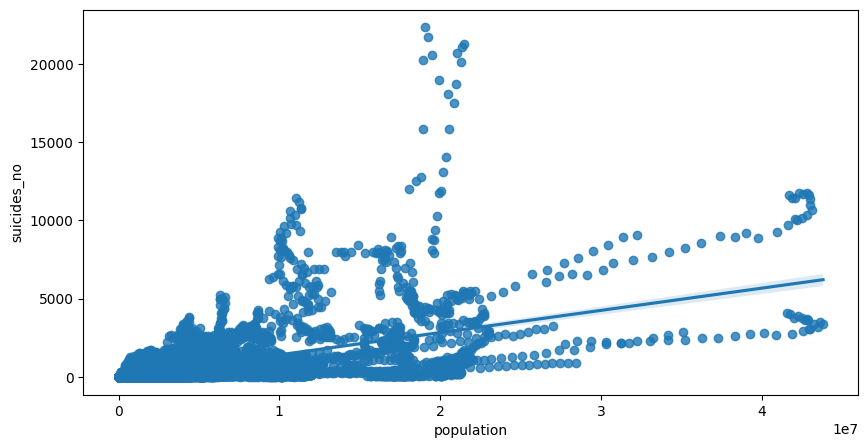

In [66]:
figure = plt.figure(figsize=(10, 5))
sns.regplot(data=suicide, x="population", y="suicides_no")

<Axes: xlabel='population', ylabel='suicides/100k pop'>

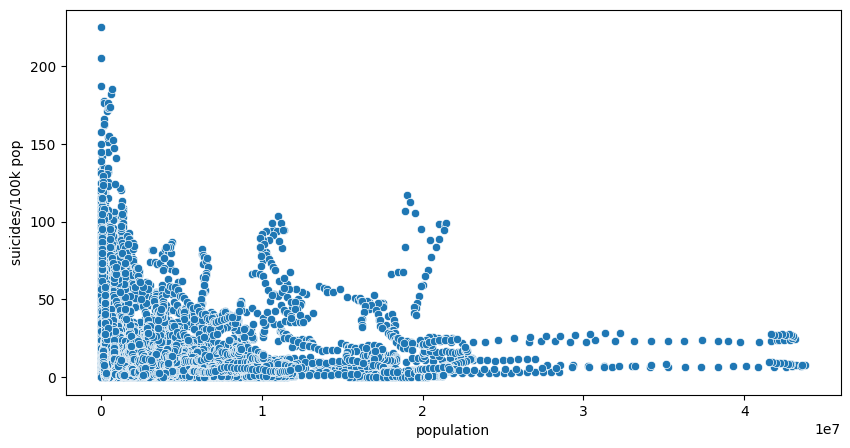

In [67]:
plt.figure(figsize=(10, 5))

sns.scatterplot(data=suicide, x="population", y="suicides/100k pop")

<Axes: xlabel='gdp_per_capita ($)', ylabel='suicides/100k pop'>

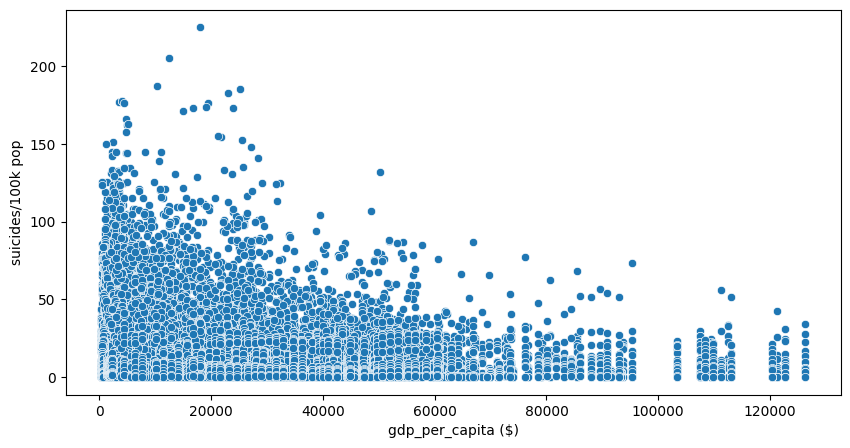

In [68]:
plt.figure(figsize=(10, 5))

sns.scatterplot(data=suicide, x="gdp_per_capita ($)", y="suicides/100k pop")

C:\Users\William\AppData\Local\Temp\ipykernel_11216\1904067651.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(suicide.corr(), annot=True, fmt=".1f", linewidths=.5, center=1)


<Axes: >

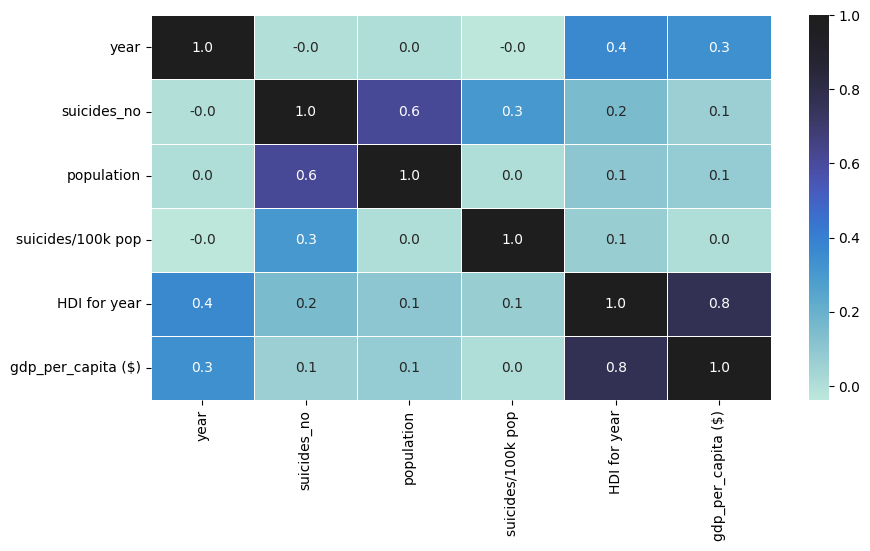

In [77]:
plt.figure(figsize=(10,5))
sns.heatmap(suicide.corr(), annot=True, fmt=".1f", linewidths=.5, center=1)

<Axes: xlabel='sex', ylabel='suicides_no'>

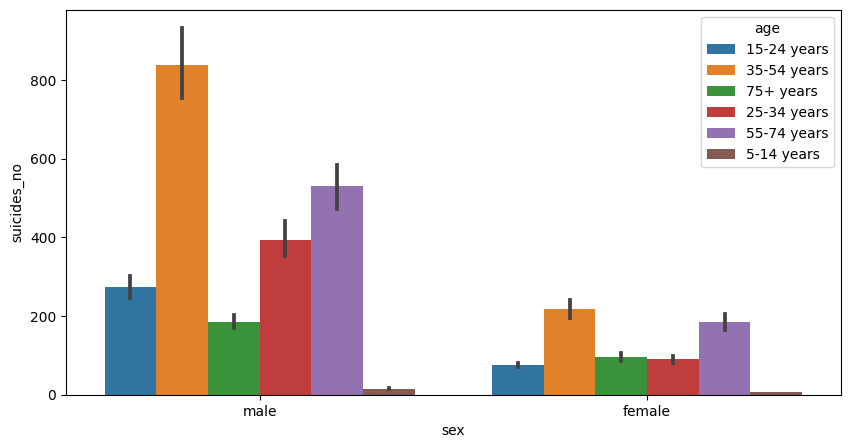

In [82]:
plt.figure(figsize=(10,5))

sns.barplot(data=suicide, x="sex", y="suicides_no", hue="age")

<Axes: xlabel='sex', ylabel='suicides_no'>

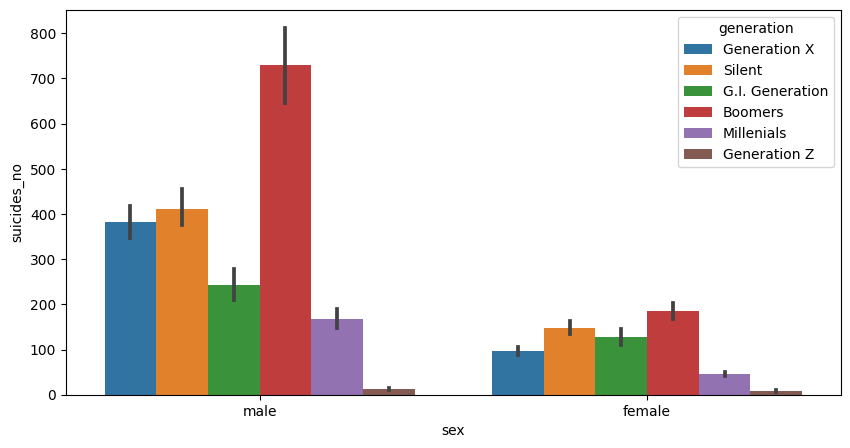

In [83]:
plt.figure(figsize=(10,5))

sns.barplot(data=suicide, x="sex", y="suicides_no", hue="generation")

<Axes: xlabel='suicides_no', ylabel='country'>

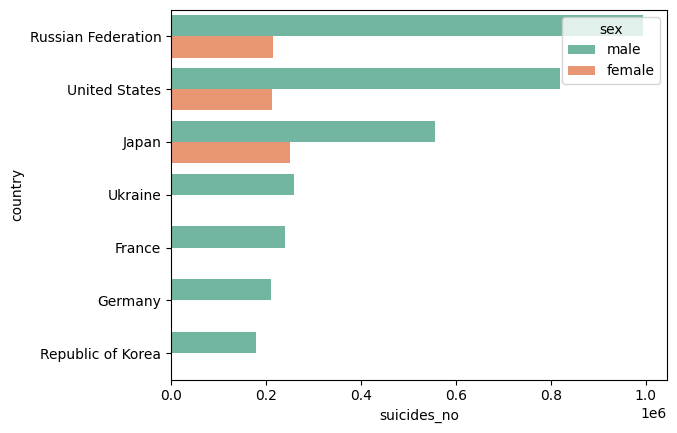

In [101]:
suicides_by_country_by_sex = suicide["suicides_no"].groupby(by=[suicide["country"], suicide["sex"]]).sum().reset_index().sort_values(by="suicides_no", ascending=False)

sns.barplot(data=suicides_by_country_by_sex.head(10), x="suicides_no", y="country", hue="sex", palette="Set2")